<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/NLP/4-2-Contextualized-token-embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L2 - Contextualized Token Embeddings

In [1]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=19u8Flt0OeP9igj19GXh242nZUbeS0pQW' -O requirements.txt


--2024-10-02 10:33:09--  https://drive.google.com/uc?export=download&id=19u8Flt0OeP9igj19GXh242nZUbeS0pQW
Resolving drive.google.com (drive.google.com)... 142.250.101.100, 142.250.101.101, 142.250.101.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19u8Flt0OeP9igj19GXh242nZUbeS0pQW&export=download [following]
--2024-10-02 10:33:09--  https://drive.usercontent.google.com/download?id=19u8Flt0OeP9igj19GXh242nZUbeS0pQW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454 [application/octet-stream]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     454  --.-KB/s    i

In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

## GloVe word embeddings

In [5]:
import gensim.downloader as api
word_vectors = api.load('glove-wiki-gigaword-100')
#word_vectors = api.load('word2vec-google-news-300')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [8]:
word_vectors['queen'].shape

(100,)

In [9]:
word_vectors['king'][:20]

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 ], dtype=float32)

In [10]:
# Words to visualize
words = ["king", "princess", "monarch", "throne", "crown",
         "mountain", "ocean", "tv", "rainbow", "cloud", "queen"]

# Get word vectors
vectors = np.array([word_vectors[word] for word in words])

In [17]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

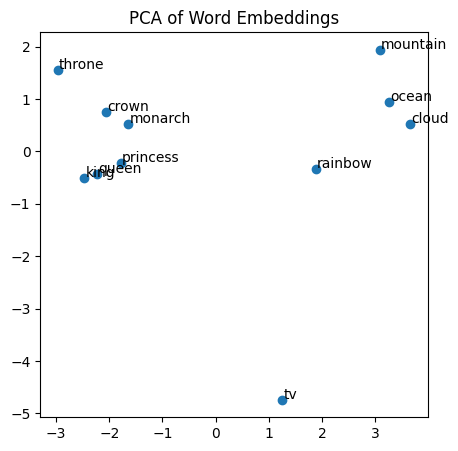

In [18]:
# Plotting
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
for i, word in enumerate(words):
    axes.annotate(word, (vectors_pca[i, 0]+.02, vectors_pca[i, 1]+.02))
axes.set_title('PCA of Word Embeddings')
plt.show()

## Word2Vec algebra

In [19]:
result = word_vectors.most_similar(positive=['king', 'woman'],
                                   negative=['man'], topn=1)

# Output the result
print(f"""
    The word closest to 'king' - 'man' + 'woman' is: '{result[0][0]}'
    with a similarity score of {result[0][1]}""")


    The word closest to 'king' - 'man' + 'woman' is: 'queen'
    with a similarity score of 0.7698540687561035


## GloVe vs BERT: words in context

In [20]:
from transformers import BertTokenizer, BertModel

# Download the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Download the model
model = BertModel.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [21]:
# Function to get BERT embeddings
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :]  # +1 to account for [CLS] token
    return word_embedding

In [23]:
sentence1 = "The bat flew out of the cave at night." # 박쥐
sentence2 = "He swung the bat and hit a home run." # 야구 방망이

In [29]:
sentence1 = "The bank of the river was calm and peaceful." # (bank as in the side of the river)
sentence2 = "She went to the bank to deposit some money." # (bank as a financial institution)

In [30]:


word = "bank"


In [31]:

bert_embedding1 = get_bert_embeddings(sentence1, word).detach().numpy()
bert_embedding2 = get_bert_embeddings(sentence2, word).detach().numpy()
word_embedding = word_vectors[word]

In [32]:
print("BERT Embedding for 'bank' in sentence 1:", bert_embedding1[:5])
print("BERT Embedding for 'bank' in sentence 2:", bert_embedding2[:5])

BERT Embedding for 'bank' in sentence 1: [-0.17743318 -0.70548034  0.01427186 -0.31448114 -0.3563957 ]
BERT Embedding for 'bank' in sentence 2: [ 0.5075126  -0.34651533 -0.19489053 -0.10546299  1.103025  ]


In [33]:

print("GloVe Embedding for 'bat':", word_embedding[:5])

GloVe Embedding for 'bat': [ 0.41869  -0.92211   0.048684  0.11798   0.22062 ]


In [34]:


bert_similarity = cosine_similarity([bert_embedding1], [bert_embedding2])[0][0]
word_embedding_similarity = cosine_similarity([word_embedding], [word_embedding])[0][0]

print()
print(f"Cosine Similarity between BERT embeddings in different contexts: {bert_similarity}")
print(f"Cosine Similarity between GloVe embeddings: {word_embedding_similarity}")



Cosine Similarity between BERT embeddings in different contexts: 0.4849899709224701
Cosine Similarity between GloVe embeddings: 1.0


## Cross Encoder

In [ ]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', max_length=512,
                     default_activation_function=torch.nn.Sigmoid())

In [41]:
question = "What is the square root of 144?"
# Define sentences to compare
answers = [
    "The square root of 144 is 12.",
    "The square root of 100 is 10.",
    "The square root of 81 is 9.",
    "The square root of 169 is 13."
]

In [ ]:
# Question: "What is the square root of 144?"
# Choices:

# "The square root of 144 is 12."
# "The square root of 100 is 10."
# "The square root of 81 is 9."
# "The square root of 169 is 13."

In [ ]:
# Question: "Who wrote 'Romeo and Juliet'?"
# Answers:

# "William Shakespeare wrote 'Romeo and Juliet'."
# "Mark Twain wrote 'Adventures of Huckleberry Finn'."
# "J.K. Rowling wrote the 'Harry Potter' series."
# "George Orwell wrote '1984'."

In [42]:
scores = model.predict([(question, answers[0]), (question, answers[1]),
                        (question, answers[2]), (question, answers[3])])
print(scores)

[0.9998907  0.5401498  0.29559308 0.38837096]


In [43]:

most_relevant_idx = torch.argmax(torch.tensor(scores)).item()
print(f"The most relevant passage is: {answers[most_relevant_idx]}")

The most relevant passage is: The square root of 144 is 12.
